<a href="https://colab.research.google.com/github/shap0011/machine_learning_fall_2024/blob/main/Data_Cleaning_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

**Important Note:** The slides in the deck have modified versions of the dataset to illustrate and provide examples for various errors to clean. The real dataset for this project may not have the same errors, so don't expect to find the exact same observations as in the slides.

In [1]:
# mount to /content/drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# First import the libraries you'll need
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
# Load 'real_estate.csv' in a pandas dataframe 'df'
# df = pd.read_csv('real_estate.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/real__estate.csv')
df.head(10)

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,property_type
0,295850,2013,234,81,1,1,584,2013,0,NaN,Condo
1,216500,2006,169,51,1,1,612,1965,0,1.0,Condo
2,279900,2012,216,74,1,1,615,1963,0,NaN,Condo
3,379900,2005,265,92,1,1,618,2000,33541,NaN,Condo
4,340000,2002,88,30,1,1,634,1992,0,NaN,Condo
5,265000,2004,168,58,1,1,641,1947,0,NaN,Condo
6,240000,2011,176,61,1,1,642,1944,0,NaN,Bunglow
7,388100,2005,266,92,1,1,650,2000,33541,NaN,Condo
8,240000,2013,188,65,1,1,660,1983,0,NaN,Condo
9,250000,2007,147,51,1,1,664,1965,0,NaN,Condo


In [6]:
df.tail(10)

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,property_type
1873,569000,1994,1024,312,5,5,7165,1991,43995,1.0,Bunglow
1874,370000,2004,1045,318,5,5,7578,2008,87120,1.0,Bunglow
1875,235000,2006,1061,323,5,5,7594,2006,36154,1.0,Bunglow
1876,760000,2008,881,249,5,5,7842,2003,436035,1.0,Bunglow
1877,555000,2003,1966,599,5,5,8450,2004,91911,1.0,Bunglow
1878,385000,2002,1250,381,5,6,6381,2004,224334,1.0,Bunglow
1879,690000,2015,1553,473,5,6,6501,1956,23086,1.0,Bunglow
1880,600000,1999,942,287,5,6,7064,1995,217800,1.0,Bunglow
1881,759900,2009,803,245,5,6,7500,2006,8886,1.0,Bunglow
1882,735000,2015,1459,444,5,6,7515,1958,10497,1.0,Bunglow


#### Now let's get started with cleaning the data!

In [7]:
df.describe()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0
mean,422839.807754,2007.111524,466.777483,140.454063,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0
std,151462.593276,5.196898,231.656645,72.929765,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0
min,200000.000000,1993.000000,88.000000,30.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0
25%,300000.000000,2004.000000,320.000000,94.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0
50%,392000.000000,2007.000000,426.000000,125.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0
75%,525000.000000,2011.000000,569.000000,169.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0
max,800000.000000,2016.000000,4508.000000,1374.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0


## I. Handle Missing Data

* For example, the `basement` feature? It has values **1** and **NaN**.

In [8]:
# Display unique values of 'basement'
df['basement'].unique()

array([nan,  1.])

In [9]:
# Display unique values of 'property_type'
df['property_type'].unique()

array(['Condo', 'Bunglow'], dtype=object)

The **NaN** values are missing values. They actually indicate that the property does not have a `basement`. Therefore, let's replace them with the value **0**.

Using the `.fillna()` function replace **NaN** values with 0.

In [10]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.10
aiosignal                          1.3.2
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
altair                             5.5.0
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.7
astropy-iers-data                  0.2024.12.16.0.35.48
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.3.0
audioread        

In [11]:
# Replace missing basement values to 0
# inplace=True updates the values in the original DataFrame.
#df['basement']= df['basement'].fillna(0)
df['basement'].fillna(0, inplace=True)

<ipython-input-11-fd344a5d5627>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['basement'].fillna(0, inplace=True)


In [13]:
# Display unique values of 'basement'
df['basement'].unique()

array([0., 1.])

In [14]:
df.basement

,basement
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
1878,1.0
1879,1.0
1880,1.0
1881,1.0


In [ ]:
# change the basement type to integer
df.basement=df.basement.astype(int)

In [ ]:
df['basement'].unique()

array([0, 1])

In [ ]:
df.basement

,basement
0,0
1,1
2,0
3,0
4,0
...,...
1878,1
1879,1
1880,1
1881,1


In [15]:
df.describe()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1883.000000
mean,422839.807754,2007.111524,466.777483,140.454063,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,0.879979
std,151462.593276,5.196898,231.656645,72.929765,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.325073
min,200000.000000,1993.000000,88.000000,30.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,0.000000
25%,300000.000000,2004.000000,320.000000,94.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.000000
50%,392000.000000,2007.000000,426.000000,125.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.000000
75%,525000.000000,2011.000000,569.000000,169.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.000000
max,800000.000000,2016.000000,4508.000000,1374.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.000000


## II. Remove "Guilty" Outliers

Outliers can cause problems with certain types of models. For example, linear regression models are less robust to outliers than decision tree models. If you have a good reason to remove an outlier, it will help your model's performance.

#### A. Plot the violin plots for <code style="color:steelblue">'beds'</code>, <code style="color:steelblue">'sqft'</code>, and <code style="color:steelblue">'lot_size'</code>.
* **Tip:** If you want to plot multiple charts in the same code cell, remember to separate them by <code style="color:steelblue">plt.show()</code>, or else they will overlap.
* Among those features, do any look like they have potential outliers?

In [16]:
import warnings
warnings.filterwarnings('ignore')

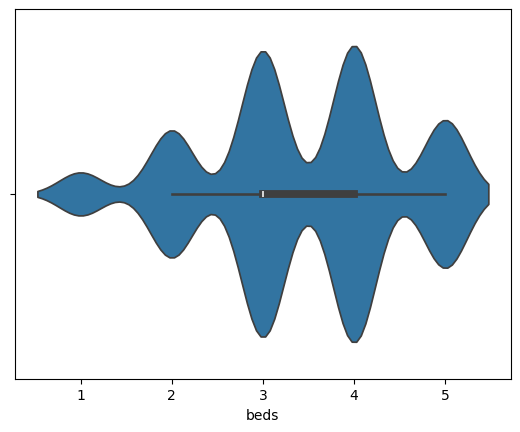

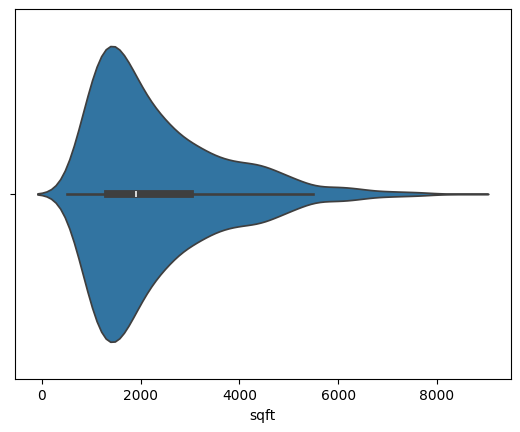

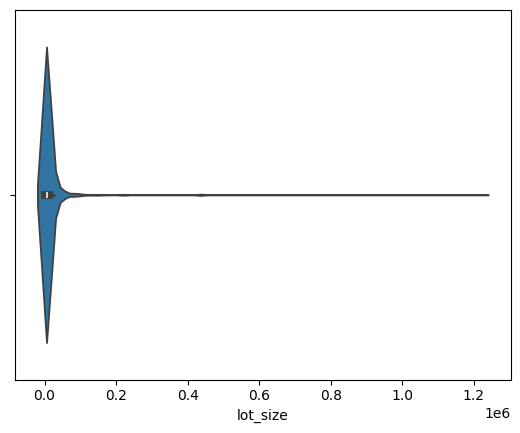

In [18]:
# box plot of beds
# sns.violinplot(df.beds, data=df)
sns.violinplot(df.beds, orient='h')
plt.show()
# Violin plot of sqft
sns.violinplot(df.sqft, orient='h')
plt.show()
# Violin plot of lot_size
sns.violinplot(df.lot_size, orient='h')
plt.show()

Among those three features, it looks like <code style="color:steelblue">lot_size</code> has a potential outlier! Look at its long and skinny tail. Let's look at the largest 5 lot sizes just to confirm.

#### B. Sort <code style="color:steelblue">df.lot_size</code> and display the top 5 samples.
* You can sort a Series with the <code style="color:steelblue">.sort_values()</code> function.
* **Tip:** <code style="color:steelblue">.sort_values()</code> has an argument called <code style="color:steelblue">ascending=</code>. By default, it's <code style="color:steelblue">True</code>
* **Tip:** You can chain functions together. This exercise can be completed in 1 line of code.

In [19]:
# Print top 5 homes with largest lot_size
df.lot_size.sort_values().tail()

,lot_size
1115,435600
1832,436035
1876,436035
1111,436471
102,1220551


The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft.

#### C. Display the entire row for that observation with the huge lot size.
* How many bedrooms and bathrooms does the property have?
* What's its property type?
* What's its transaction price?
* **Do you think this observation could be an outlier? Why?**

In [22]:
df.iloc[102]

,102
price,292999
year_sold,2014
property_tax,230
insurance,79
beds,2
baths,1
sqft,875
year_built,1950
lot_size,1220551
basement,0.0


In [25]:
# print the record where lot_size = 1220551
#df.iloc[102]
df[df.lot_size==1220551]

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,property_type
102,292999,2014,230,79,2,1,875,1950,1220551,0.0,Condo


#### D. Since all of the other observations are below 500,000 sqft, let's remove observations with <code style="color:steelblue">lot_size</code> greater than 500,000 sqft.
* You can use a boolean mask to do so (filter to keep only wanted observations).
* Overwrite the existing <code style="color:steelblue">df</code> object
* Print the length of the new <code style="color:steelblue">df</code> object.

In [26]:
df[df.lot_size<500000].shape
# df[df.lot_size<500000]

(1882, 11)

In [27]:
df.iloc[102]

,102
price,292999
year_sold,2014
property_tax,230
insurance,79
beds,2
baths,1
sqft,875
year_built,1950
lot_size,1220551
basement,0.0


In [28]:
# Drop the row with lot_size = 1220551
df = df.drop(102)

In [29]:
df.iloc[102]

,103
price,369900
year_sold,2006
property_tax,294
insurance,89
beds,2
baths,1
sqft,891
year_built,2004
lot_size,0
basement,1.0


## IV. Save the Cleaned Dataset

#### Finally, save the cleaned dataframe as  <code style="color:steelblue">'cleaned_df.csv'</code>

Before we move on to the next module, let's save the new dataframe we worked hard to clean.
* We'll use Pandas's <code style="color:steelblue">.to_csv()</code> function.
* Set <code style="color:steelblue">index=<span style="color:crimson">None</span></code> so that Pandas drops the indices and only stores the actual data in the CSV.

In [30]:
# Save the cleaned dataset
df.to_csv('cleaned_df.csv', index=None)

In [31]:
new = pd.read_csv('cleaned_df.csv')
new.head()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,property_type
0,295850,2013,234,81,1,1,584,2013,0,0.0,Condo
1,216500,2006,169,51,1,1,612,1965,0,1.0,Condo
2,279900,2012,216,74,1,1,615,1963,0,0.0,Condo
3,379900,2005,265,92,1,1,618,2000,33541,0.0,Condo
4,340000,2002,88,30,1,1,634,1992,0,0.0,Condo



We will use <code style="color:steelblue">'cleaned_df.csv'</code> in all the other modules!
In the next module, **Feature Engineering**, you'll use the cleaned dataset to create new features that will improve model performance.